In [1]:
#!jupyter nbconvert --to script traffic_corr_analysis.ipynb

[NbConvertApp] Converting notebook traffic_corr_analysis.ipynb to script
[NbConvertApp] Writing 61529 bytes to traffic_corr_analysis.py


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from traffic_data_preprocessor import *

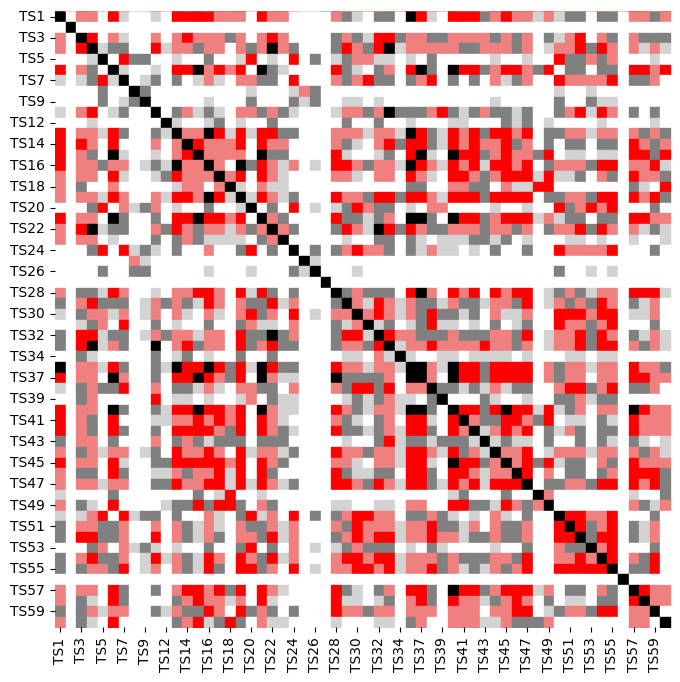

In [3]:
# TS10_DIR_01 values are removed since its all zero and TS35_DIR_35 data are not available
# Creating a dataframe of 'value' in all roads

df_all_train = pd.concat([
    df_e01_dir_1_train['value'], df_e02_dir_1_train['value'], df_e03_dir_1_train['value'], df_e04_dir_1_train['value'], df_e05_dir_1_train['value'], df_e06_dir_1_train['value'],
    df_e07_dir_1_train['value'], df_e08_dir_1_train['value'], df_e09_dir_1_train['value'],                              df_e11_dir_1_train['value'], df_e12_dir_1_train['value'],
    df_e13_dir_1_train['value'], df_e14_dir_1_train['value'], df_e15_dir_1_train['value'], df_e16_dir_1_train['value'], df_e17_dir_1_train['value'], df_e18_dir_1_train['value'],
    df_e19_dir_1_train['value'], df_e20_dir_1_train['value'], df_e21_dir_1_train['value'], df_e22_dir_1_train['value'], df_e23_dir_1_train['value'], df_e24_dir_1_train['value'],
    df_e25_dir_1_train['value'], df_e26_dir_1_train['value'], df_e27_dir_1_train['value'], df_e28_dir_1_train['value'], df_e29_dir_1_train['value'], df_e30_dir_1_train['value'],
    df_e31_dir_1_train['value'], df_e32_dir_1_train['value'], df_e33_dir_1_train['value'], df_e34_dir_1_train['value'],                              df_e36_dir_1_train['value'],
    df_e37_dir_1_train['value'], df_e38_dir_1_train['value'], df_e39_dir_1_train['value'], df_e40_dir_1_train['value'], df_e41_dir_1_train['value'], df_e42_dir_1_train['value'],
    df_e43_dir_1_train['value'], df_e44_dir_1_train['value'], df_e45_dir_1_train['value'], df_e46_dir_1_train['value'], df_e47_dir_1_train['value'], df_e48_dir_1_train['value'],
    df_e49_dir_1_train['value'], df_e50_dir_1_train['value'], df_e51_dir_1_train['value'], df_e52_dir_1_train['value'], df_e53_dir_1_train['value'], df_e54_dir_1_train['value'],
    df_e55_dir_1_train['value'], df_e56_dir_1_train['value'], df_e57_dir_1_train['value'], df_e58_dir_1_train['value'], df_e59_dir_1_train['value'], df_e60_dir_1_train['value']]
, axis=1 )


# Create new column names
new_column_names = ["TS1",  "TS2",  "TS3",  "TS4",  "TS5",  "TS6",
                    "TS7",  "TS8",  "TS9",          "TS11", "TS12",
                    "TS13", "TS14", "TS15", "TS16", "TS17", "TS18",
                    "TS19", "TS20", "TS21", "TS22", "TS23", "TS24",
                    "TS25", "TS26", "TS27", "TS28", "TS29", "TS30",
                    "TS31", "TS32", "TS33", "TS34",         "TS36",
                    "TS37", "TS38", "TS39", "TS40", "TS41", "TS42",
                    "TS43", "TS44", "TS45", "TS46", "TS47", "TS48",
                    "TS49", "TS50", "TS51", "TS52", "TS53", "TS54",
                    "TS55", "TS56", "TS57", "TS58", "TS59", "TS60"
                    ]

# Rename the columns
df_all_train.columns = new_column_names

# Compute the correlation matrix
corr_matrix = df_all_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=False, square=True)

# Add markers based on correlation ranges
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        value = corr_matrix.iloc[i, j]
        if   0.0 <= value <= 0.75:
            plt.scatter(j + 0.5, i + 0.5, color='white', s=50, marker='s')  # white marker
        elif 0.75 < value <= 0.80:
            plt.scatter(j + 0.5, i + 0.5, color='lightgrey', s=50, marker='s')  # grey marker
        elif 0.80 < value <= 0.85:
            plt.scatter(j + 0.5, i + 0.5, color='grey', s=50, marker='s')  # grey marker
        elif 0.85 < value <= 0.90:
            plt.scatter(j + 0.5, i + 0.5, color='lightcoral', s=50, marker='s')  # grey marker
        elif 0.90 < value <= 0.95:
            plt.scatter(j + 0.5, i + 0.5, color='red', s=50, marker='s')  # red marker
        elif 0.95 < value <= 1.00:
            plt.scatter(j + 0.5, i + 0.5, color='black', s=50, marker='s')  # black marker

#plt.title("Correlation Matrix with Markers")
plt.show()

#corr_matrix

In [8]:
corr_matrix.to_excel("corr_matrix.xlsx")

### Analysis on Corr Matrix

In [9]:
# Step 1: Compute the mean absolute correlation for each column
mean_corr = corr_matrix.abs().mean()

# Step 2: Sort the columns by mean correlation (descending order)
mean_corr_sorted = mean_corr.sort_values(ascending=False)

# Step 3: Display the top N columns with the highest mean correlation
top_n = 10  # Change this to the number of top columns you want
top_columns = mean_corr_sorted.head(top_n)

print("Top columns with the highest mean correlation values:")
print(top_columns)


Top columns with the highest mean correlation values:
TS19    0.850433
TS36    0.849289
TS16    0.849145
TS13    0.844291
TS47    0.843716
TS40    0.839371
TS22    0.836466
TS37    0.835659
TS33    0.834791
TS54    0.833286
dtype: float64


In [ ]:
# Create a list to store correlation results
correlation_results = []

# Iterate through each column and find the highest correlated values
for col in corr_matrix.columns:
    # Exclude self-correlation (value of 1.0) and find the maximum correlation value
    max_corr_value = corr_matrix[col][corr_matrix[col] < 1.0].max()
    
    # Find columns with the highest correlation value
    high_corr_cols = corr_matrix.index[(corr_matrix[col] == max_corr_value)].tolist()
    
    if high_corr_cols:  # Only store if there are correlated columns
        correlation_results.append((col, high_corr_cols, max_corr_value))

# Sort the results by correlation value in descending order
correlation_results.sort(key=lambda x: x[2], reverse=True)

# Print the sorted results
for result in correlation_results:
    print(f"'{result[0]}': {result[1]} (Correlation: {result[2]:.2f})")

### 1 > Correlation > = 0.95  

In [4]:
# Iterate through each column and find highly correlated columns
for col in corr_matrix.columns:
    #high_corr_cols = corr_matrix.index[(corr_matrix[col] > 0.95) & (corr_matrix[col] < 1.0)].tolist()
    high_corr_cols = corr_matrix.index[(corr_matrix[col] >= 0.95) & (corr_matrix[col] <= 1)].tolist()
    
    if high_corr_cols:  # Only print if there are correlated columns
        print(f"'{col}': {high_corr_cols},")

'TS1': ['TS1', 'TS36'],
'TS2': ['TS2'],
'TS3': ['TS3'],
'TS4': ['TS4', 'TS22', 'TS33'],
'TS5': ['TS5'],
'TS6': ['TS6', 'TS15', 'TS21', 'TS37', 'TS40'],
'TS7': ['TS7'],
'TS8': ['TS8'],
'TS9': ['TS9'],
'TS11': ['TS11', 'TS33'],
'TS12': ['TS12'],
'TS13': ['TS13', 'TS16', 'TS36'],
'TS14': ['TS14'],
'TS15': ['TS6', 'TS15', 'TS21', 'TS37', 'TS40'],
'TS16': ['TS13', 'TS16', 'TS19', 'TS36'],
'TS17': ['TS17'],
'TS18': ['TS18'],
'TS19': ['TS16', 'TS19'],
'TS20': ['TS20'],
'TS21': ['TS6', 'TS15', 'TS21', 'TS36', 'TS37', 'TS40'],
'TS22': ['TS4', 'TS22', 'TS32'],
'TS23': ['TS23'],
'TS24': ['TS24'],
'TS25': ['TS25'],
'TS26': ['TS26'],
'TS27': ['TS27'],
'TS28': ['TS28', 'TS37'],
'TS29': ['TS29'],
'TS30': ['TS30'],
'TS31': ['TS31'],
'TS32': ['TS22', 'TS32'],
'TS33': ['TS4', 'TS11', 'TS33'],
'TS34': ['TS34'],
'TS36': ['TS1', 'TS13', 'TS16', 'TS21', 'TS36', 'TS37', 'TS40'],
'TS37': ['TS6', 'TS15', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40'],
'TS38': ['TS38'],
'TS39': ['TS39'],
'TS40': ['TS6', 'TS15', 'TS21'

In [5]:
# Define model-station mapping
model_stations_95_1 = {
'TS1': ['TS1', 'TS36'],
'TS2': ['TS2'],
'TS3': ['TS3'],
'TS4': ['TS4', 'TS22', 'TS33'],
'TS5': ['TS5'],
'TS6': ['TS6', 'TS15', 'TS21', 'TS37', 'TS40'],
'TS7': ['TS7'],
'TS8': ['TS8'],
'TS9': ['TS9'],
'TS11': ['TS11', 'TS33'],
'TS12': ['TS12'],
'TS13': ['TS13', 'TS16', 'TS36'],
'TS14': ['TS14'],
'TS15': ['TS6', 'TS15', 'TS21', 'TS37', 'TS40'],
'TS16': ['TS13', 'TS16', 'TS19', 'TS36'],
'TS17': ['TS17'],
'TS18': ['TS18'],
'TS19': ['TS16', 'TS19'],
'TS20': ['TS20'],
'TS21': ['TS6', 'TS15', 'TS21', 'TS36', 'TS37', 'TS40'],
'TS22': ['TS4', 'TS22', 'TS32'],
'TS23': ['TS23'],
'TS24': ['TS24'],
'TS25': ['TS25'],
'TS26': ['TS26'],
'TS27': ['TS27'],
'TS28': ['TS28', 'TS37'],
'TS29': ['TS29'],
'TS30': ['TS30'],
'TS31': ['TS31'],
'TS32': ['TS22', 'TS32'],
'TS33': ['TS4', 'TS11', 'TS33'],
'TS34': ['TS34'],
'TS36': ['TS1', 'TS13', 'TS16', 'TS21', 'TS36', 'TS37', 'TS40'],
'TS37': ['TS6', 'TS15', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40'],
'TS38': ['TS38'],
'TS39': ['TS39'],
'TS40': ['TS6', 'TS15', 'TS21', 'TS36', 'TS37', 'TS40', 'TS45', 'TS57'],
'TS41': ['TS41'],
'TS42': ['TS42'],
'TS43': ['TS43'],
'TS44': ['TS44'],
'TS45': ['TS40', 'TS45'],
'TS46': ['TS46'],
'TS47': ['TS47'],
'TS48': ['TS48'],
'TS49': ['TS49'],
'TS50': ['TS50'],
'TS51': ['TS51'],
'TS52': ['TS52'],
'TS53': ['TS53'],
'TS54': ['TS54'],
'TS55': ['TS55'],
'TS56': ['TS56'],
'TS57': ['TS40', 'TS57'],
'TS58': ['TS58'],
'TS59': ['TS59'],
'TS60': ['TS60'],
}

In [23]:
sorted_models_95_1 = sorted(model_stations_95_1.items(), key=lambda x: len(x[1]), reverse=True)
sorted_models_95_1
df_sorted_models_95_1 = pd. DataFrame(sorted_models_95_1)
new_columns_list = ["Model", "Station"]
df_sorted_models_95_1.columns = new_columns_list
df_sorted_models_95_1.to_excel("corr_model_xlsx/models_95_1.xlsx")

In [ ]:
for i in df_sorted_models_95_1.index:
    list_1 = ['TS6', 'TS15', 'TS21', 'TS36', 'TS37', 'TS40', 'TS45', 'TS57',
              'TS1', 'TS13', 'TS16', 'TS21', 'TS36', 'TS37', 'TS40',
              'TS4', 'TS22', 'TS33',
              'TS6', 'TS15', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40',
              'TS13', 'TS16', 'TS19', 'TS36',
              'TS4', 'TS22', 'TS32',
              'TS4', 'TS11', 'TS33']
    list_2 = df_sorted_models_95_1.iloc[i,1]

    set_1 = set(list_1)
    set_2 = set(list_2)

    # Find unique values in list2 that are not in list1
    unique_values = set_2 - set_1

    # Convert the result back to a list (if needed)
    unique_values_list = list(unique_values)

    print(unique_values_list)

### 1 >= Correlation > 0.90  

In [35]:
# Iterate through each column and find highly correlated columns
for col in corr_matrix.columns:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] >= 0.9)& (corr_matrix[col] <= 1)].tolist()
    
    if high_corr_cols:  # Only print if there are correlated columns
        print(f"'{col}': {high_corr_cols},")

'TS1': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45'],
'TS2': ['TS2'],
'TS3': ['TS3', 'TS4', 'TS14', 'TS22', 'TS32', 'TS33', 'TS52'],
'TS4': ['TS3', 'TS4', 'TS11', 'TS22', 'TS29', 'TS32', 'TS33', 'TS52', 'TS54'],
'TS5': ['TS5', 'TS7', 'TS20', 'TS24', 'TS50'],
'TS6': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS7': ['TS5', 'TS7', 'TS24', 'TS31', 'TS38', 'TS50', 'TS55'],
'TS8': ['TS8'],
'TS9': ['TS9'],
'TS11': ['TS4', 'TS11', 'TS33', 'TS39', 'TS52', 'TS54'],
'TS12': ['TS12'],
'TS13': ['TS1', 'TS6', 'TS13', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS45', 'TS47'],
'TS14': ['TS1', 'TS3', 'TS6', 'TS14', 'TS15', 'TS19', 'TS21', 'TS33', 'TS36', 'TS37', 'TS40', 'TS42', 'TS45', 'TS57'],
'TS15': ['TS1', 'TS6', 'TS14', 'TS15', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45

In [36]:
model_stations_90_1 = {
'TS1': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45'],
'TS2': ['TS2'],
'TS3': ['TS3', 'TS4', 'TS14', 'TS22', 'TS32', 'TS33', 'TS52'],
'TS4': ['TS3', 'TS4', 'TS11', 'TS22', 'TS29', 'TS32', 'TS33', 'TS52', 'TS54'],
'TS5': ['TS5', 'TS7', 'TS20', 'TS24', 'TS50'],
'TS6': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS7': ['TS5', 'TS7', 'TS24', 'TS31', 'TS38', 'TS50', 'TS55'],
'TS8': ['TS8'],
'TS9': ['TS9'],
'TS11': ['TS4', 'TS11', 'TS33', 'TS39', 'TS52', 'TS54'],
'TS12': ['TS12'],
'TS13': ['TS1', 'TS6', 'TS13', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS45', 'TS47'],
'TS14': ['TS1', 'TS3', 'TS6', 'TS14', 'TS15', 'TS19', 'TS21', 'TS33', 'TS36', 'TS37', 'TS40', 'TS42', 'TS45', 'TS57'],
'TS15': ['TS1', 'TS6', 'TS14', 'TS15', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS16': ['TS1', 'TS13', 'TS16', 'TS19', 'TS21', 'TS28', 'TS29', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS45', 'TS47', 'TS54', 'TS55', 'TS59'],
'TS17': ['TS6', 'TS13', 'TS17', 'TS19', 'TS21', 'TS36', 'TS40', 'TS41', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57'],
'TS18': ['TS18', 'TS48', 'TS49', 'TS60'],
'TS19': ['TS6', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS20': ['TS5', 'TS20', 'TS24', 'TS30', 'TS50', 'TS53', 'TS55'],
'TS21': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS47', 'TS57', 'TS58'],
'TS22': ['TS3', 'TS4', 'TS13', 'TS22', 'TS29', 'TS32', 'TS33', 'TS36', 'TS52', 'TS54'],
'TS23': ['TS23'],
'TS24': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS50', 'TS55'],
'TS25': ['TS25'],
'TS26': ['TS26'],
'TS27': ['TS27'],
'TS28': ['TS6', 'TS15', 'TS16', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS46', 'TS47', 'TS57', 'TS58', 'TS59'],
'TS29': ['TS4', 'TS16', 'TS22', 'TS29', 'TS32', 'TS47', 'TS54'],
'TS30': ['TS20', 'TS24', 'TS30', 'TS32', 'TS38', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS31': ['TS7', 'TS31', 'TS38', 'TS50', 'TS55'],
'TS32': ['TS3', 'TS4', 'TS19', 'TS22', 'TS29', 'TS30', 'TS32', 'TS33', 'TS47', 'TS52', 'TS54'],
'TS33': ['TS3', 'TS4', 'TS11', 'TS14', 'TS19', 'TS22', 'TS32', 'TS33', 'TS38', 'TS43', 'TS52', 'TS54', 'TS55'],
'TS34': ['TS34'],
'TS36': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS57'],
'TS37': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS57', 'TS58'],
'TS38': ['TS7', 'TS30', 'TS31', 'TS33', 'TS38', 'TS51', 'TS52', 'TS55'],
'TS39': ['TS11', 'TS39'],
'TS40': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58'],
'TS41': ['TS1', 'TS6', 'TS15', 'TS17', 'TS19', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS45', 'TS46', 'TS49', 'TS57'],
'TS42': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS42', 'TS45', 'TS47', 'TS57'],
'TS43': ['TS33', 'TS43'],
'TS44': ['TS13', 'TS16', 'TS19', 'TS28', 'TS36', 'TS37', 'TS40', 'TS44', 'TS47'],
'TS45': ['TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS47', 'TS49', 'TS57'],
'TS46': ['TS6', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS46', 'TS47', 'TS57', 'TS58', 'TS59'],
'TS47': ['TS13', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS29', 'TS32', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS48': ['TS18', 'TS48'],
'TS49': ['TS6', 'TS15', 'TS17', 'TS18', 'TS40', 'TS41', 'TS45', 'TS49'],
'TS50': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS31', 'TS50', 'TS51', 'TS52', 'TS55'],
'TS51': ['TS30', 'TS38', 'TS50', 'TS51', 'TS52', 'TS55'],
'TS52': ['TS3', 'TS4', 'TS11', 'TS22', 'TS30', 'TS32', 'TS33', 'TS38', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS53': ['TS20', 'TS53', 'TS55'],
'TS54': ['TS4', 'TS11', 'TS16', 'TS19', 'TS22', 'TS29', 'TS30', 'TS32', 'TS33', 'TS47', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS55': ['TS7', 'TS16', 'TS19', 'TS20', 'TS24', 'TS30', 'TS31', 'TS33', 'TS38', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS56': ['TS56'],
'TS57': ['TS6', 'TS14', 'TS15', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS47', 'TS57', 'TS58'],
'TS58': ['TS6', 'TS15', 'TS21', 'TS28', 'TS37', 'TS40', 'TS46', 'TS57', 'TS58'],
'TS59': ['TS16', 'TS19', 'TS28', 'TS46', 'TS47', 'TS54', 'TS55', 'TS59'],
'TS60': ['TS6', 'TS15', 'TS18', 'TS60']
}

In [37]:
sorted_models_90_1 = sorted(model_stations_90_1.items(), key=lambda x: len(x[1]), reverse=True)
sorted_models_90_1
df_sorted_models_90_1 = pd. DataFrame(sorted_models_90_1)
new_columns_list = ["Model", "Station"]
df_sorted_models_90_1.columns = new_columns_list
df_sorted_models_90_1.to_excel("corr_model_xlsx/models_90_1.xlsx")

In [ ]:
for i in df_sorted_models_90_1.index:
    list_1 = ['TS6', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS54', 'TS55', 'TS57', 'TS59',
              'TS7', 'TS16', 'TS19', 'TS20', 'TS24', 'TS30', 'TS31', 'TS33', 'TS38', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59',
              'TS1', 'TS6', 'TS13', 'TS14', 'TS15', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS49', 'TS57', 'TS58', 'TS60',
              'TS3', 'TS4', 'TS11', 'TS14', 'TS19', 'TS22', 'TS32', 'TS33', 'TS38', 'TS43', 'TS52', 'TS54', 'TS55',
              'TS18', 'TS48', 'TS49', 'TS60',
              'TS13', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS29', 'TS32', 'TS36', 'TS37', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS54', 'TS55', 'TS57', 'TS59',
              'TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS31', 'TS50', 'TS51', 'TS52', 'TS55',
              'TS4', 'TS11', 'TS33', 'TS39', 'TS52', 'TS54']
    list_2 = df_sorted_models_90_1.iloc[i,1]

    set_1 = set(list_1)
    set_2 = set(list_2)

    # Find unique values in list2 that are not in list1
    unique_values = set_2 - set_1

    # Convert the result back to a list (if needed)
    unique_values_list = list(unique_values)

    print(unique_values_list)

### 1 >= Correlation > 0.85

In [42]:
# Iterate through each column and find highly correlated columns
for col in corr_matrix.columns:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] >= 0.85)& (corr_matrix[col] <= 1)].tolist()
    
    if high_corr_cols:  # Only print if there are correlated columns
        print(f"'{col}': {high_corr_cols},")

'TS1': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS2': ['TS2'],
'TS3': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS45', 'TS47', 'TS51', 'TS52', 'TS54', 'TS57'],
'TS4': ['TS1', 'TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS43', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS5': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS31', 'TS50', 'TS53', 'TS55'],
'TS6': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS4

In [39]:
model_stations_85_1 = {
'TS1': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS2': ['TS2'],
'TS3': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS45', 'TS47', 'TS51', 'TS52', 'TS54', 'TS57'],
'TS4': ['TS1', 'TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS43', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS5': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS31', 'TS50', 'TS53', 'TS55'],
'TS6': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS7': ['TS5', 'TS7', 'TS16', 'TS19', 'TS20', 'TS24', 'TS28', 'TS30', 'TS31', 'TS37', 'TS38', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS8': ['TS8', 'TS25'],
'TS9': ['TS9'],
'TS11': ['TS3', 'TS4', 'TS11', 'TS14', 'TS19', 'TS20', 'TS22', 'TS29', 'TS30', 'TS32', 'TS33', 'TS38', 'TS39', 'TS43', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS12': ['TS12'],
'TS13': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS14': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS47', 'TS57', 'TS58', 'TS60'],
'TS15': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS16': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS17': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS54', 'TS57', 'TS58', 'TS59'],
'TS18': ['TS1', 'TS6', 'TS14', 'TS15', 'TS17', 'TS18', 'TS21', 'TS40', 'TS41', 'TS45', 'TS48', 'TS49', 'TS60'],
'TS19': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS20': ['TS5', 'TS7', 'TS11', 'TS20', 'TS24', 'TS30', 'TS31', 'TS38', 'TS39', 'TS50', 'TS52', 'TS53', 'TS54', 'TS55'],
'TS21': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS22': ['TS1', 'TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57'],
'TS23': ['TS1', 'TS3', 'TS4', 'TS14', 'TS22', 'TS23'],
'TS24': ['TS5', 'TS7', 'TS16', 'TS20', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS38', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55'],
'TS25': ['TS8', 'TS25'],
'TS26': ['TS26'],
'TS27': ['TS27'],
'TS28': ['TS1', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS30', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS29': ['TS3', 'TS4', 'TS11', 'TS13', 'TS16', 'TS17', 'TS19', 'TS22', 'TS24', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS40', 'TS44', 'TS45', 'TS47', 'TS50', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS30': ['TS4', 'TS5', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS38', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS31': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS31', 'TS38', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS32': ['TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS22', 'TS24', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS40', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS33': ['TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS34': ['TS32', 'TS34'],
'TS36': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS37': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS38': ['TS4', 'TS7', 'TS11', 'TS16', 'TS19', 'TS20', 'TS24', 'TS28', 'TS30', 'TS31', 'TS33', 'TS36', 'TS37', 'TS38', 'TS44', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS39': ['TS4', 'TS11', 'TS20', 'TS33', 'TS39', 'TS52'],
'TS40': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS41': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS47', 'TS49', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS42': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS43': ['TS3', 'TS4', 'TS11', 'TS14', 'TS33', 'TS43'],
'TS44': ['TS1', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS45': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS54', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS46': ['TS1', 'TS6', 'TS13', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS47': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS48': ['TS18', 'TS48', 'TS49'],
'TS49': ['TS1', 'TS6', 'TS15', 'TS17', 'TS18', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS45', 'TS46', 'TS48', 'TS49', 'TS57', 'TS60'],
'TS50': ['TS4', 'TS5', 'TS7', 'TS16', 'TS20', 'TS22', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS38', 'TS44', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55'],
'TS51': ['TS3', 'TS4', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS22', 'TS24', 'TS28', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS42', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS52': ['TS3', 'TS4', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS59'],
'TS53': ['TS5', 'TS7', 'TS20', 'TS24', 'TS30', 'TS50', 'TS53', 'TS54', 'TS55'],
'TS54': ['TS3', 'TS4', 'TS7', 'TS11', 'TS13', 'TS16', 'TS17', 'TS19', 'TS20', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS55': ['TS4', 'TS5', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS44', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS56': ['TS56'],
'TS57': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS54', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS58': ['TS1', 'TS6', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS47', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS59': ['TS4', 'TS6', 'TS7', 'TS13', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS60': ['TS1', 'TS6', 'TS14', 'TS15', 'TS18', 'TS21', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS49', 'TS57', 'TS58', 'TS60']}

In [41]:
sorted_models_85_1 = sorted(model_stations_85_1.items(), key=lambda x: len(x[1]), reverse=True)
sorted_models_85_1
df_sorted_models_85_1 = pd. DataFrame(sorted_models_85_1)
new_columns_list = ["Model", "Station"]
df_sorted_models_85_1.columns = new_columns_list
df_sorted_models_85_1.to_excel("corr_model_xlsx/models_85_1.xlsx")

In [ ]:
for i in df_sorted_models_85_1.index:
    list_1 = ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59']
    list_2 = df_sorted_models_85_1.iloc[i,1]

    set_1 = set(list_1)
    set_2 = set(list_2)

    # Find unique values in list2 that are not in list1
    unique_values = set_2 - set_1

    # Convert the result back to a list (if needed)
    unique_values_list = list(unique_values)

    print(unique_values_list)

### 1 >= Correlation > 0.80

In [ ]:
# Iterate through each column and find highly correlated columns
for col in corr_matrix.columns:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] >= 0.8)& (corr_matrix[col] <= 1)].tolist()
    
    if high_corr_cols:  # Only print if there are correlated columns
        print(f"'{col}': {high_corr_cols},")

In [44]:
model_stations_80_1 = {
'TS1': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS2': ['TS2'],
'TS3': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS4': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS5': ['TS5', 'TS7', 'TS8', 'TS9', 'TS16', 'TS20', 'TS24', 'TS26', 'TS29', 'TS30', 'TS31', 'TS38', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55'],
'TS6': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS7': ['TS4', 'TS5', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS42', 'TS44', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS8': ['TS5', 'TS8', 'TS9', 'TS25', 'TS26'],
'TS9': ['TS5', 'TS8', 'TS9', 'TS20', 'TS24', 'TS26', 'TS50', 'TS53'],
'TS11': ['TS3', 'TS4', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS43', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS12': ['TS12', 'TS17', 'TS22', 'TS29', 'TS32', 'TS45', 'TS47'],
'TS13': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS14': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS15': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS16': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS17': ['TS1', 'TS3', 'TS4', 'TS6', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS18': ['TS1', 'TS3', 'TS6', 'TS14', 'TS15', 'TS17', 'TS18', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS45', 'TS48', 'TS49', 'TS57', 'TS60'],
'TS19': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS20': ['TS4', 'TS5', 'TS7', 'TS9', 'TS11', 'TS16', 'TS20', 'TS22', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS38', 'TS39', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS21': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS22': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS23': ['TS1', 'TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS15', 'TS21', 'TS22', 'TS23', 'TS32', 'TS33', 'TS36', 'TS42', 'TS43', 'TS45'],
'TS24': ['TS4', 'TS5', 'TS7', 'TS9', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS38', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS25': ['TS8', 'TS25'],
'TS26': ['TS5', 'TS8', 'TS9', 'TS24', 'TS26', 'TS50'],
'TS27': ['TS27'],
'TS28': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS29': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS30': ['TS3', 'TS4', 'TS5', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS31': ['TS4', 'TS5', 'TS7', 'TS11', 'TS16', 'TS19', 'TS20', 'TS24', 'TS28', 'TS30', 'TS31', 'TS33', 'TS37', 'TS38', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS32': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS33': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS34': ['TS3', 'TS11', 'TS14', 'TS19', 'TS22', 'TS32', 'TS34'],
'TS36': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS37': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS38': ['TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS39': ['TS3', 'TS4', 'TS11', 'TS20', 'TS22', 'TS30', 'TS32', 'TS33', 'TS38', 'TS39', 'TS43', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS40': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS41': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS54', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS42': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS43': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS32', 'TS33', 'TS36', 'TS37', 'TS39', 'TS40', 'TS41', 'TS43', 'TS45', 'TS49', 'TS52', 'TS54', 'TS57'],
'TS44': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS45': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS46': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS47': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS48': ['TS6', 'TS15', 'TS18', 'TS41', 'TS45', 'TS48', 'TS49', 'TS60'],
'TS49': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS50': ['TS4', 'TS5', 'TS7', 'TS9', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS51': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS52': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS53': ['TS4', 'TS5', 'TS7', 'TS9', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS38', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS54': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS55': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS56': ['TS56'],
'TS57': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS58': ['TS1', 'TS3', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS21', 'TS28', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS59': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS60': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS17', 'TS18', 'TS19', 'TS21', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS60'],
}

In [45]:
sorted_models_80_1 = sorted(model_stations_80_1.items(), key=lambda x: len(x[1]), reverse=True)
sorted_models_80_1
df_sorted_models_80_1 = pd. DataFrame(sorted_models_80_1)
new_columns_list = ["Model", "Station"]
df_sorted_models_80_1.columns = new_columns_list
df_sorted_models_80_1.to_excel("corr_model_xlsx/models_80_1.xlsx")

In [ ]:
for i in df_sorted_models_80_1.index:
    list_1 = ['TS7', 'TS40', 'TS15', 'TS44', 'TS6', 'TS37', 'TS46', 'TS51', 'TS28', 'TS33', 'TS14', 'TS4', 'TS1', 'TS22', 'TS36', 'TS47', 'TS23', 'TS42', 'TS17', 'TS52', 'TS12', 'TS41', 'TS30', 'TS19', 'TS59', 'TS20', 'TS55', 'TS16', 'TS54', 'TS3', 'TS38', 'TS50', 'TS29', 'TS24', 'TS13', 'TS39', 'TS21', 'TS34', 'TS57', 'TS45', 'TS53', 'TS11', 'TS43', 'TS49', 'TS32',
              'TS5', 'TS7', 'TS8', 'TS9', 'TS16', 'TS20', 'TS24', 'TS26', 'TS29', 'TS30', 'TS31', 'TS38', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55',
              'TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60',
              'TS5', 'TS8', 'TS9', 'TS25', 'TS26']

    list_2 = df_sorted_models_80_1.iloc[i,1]

    set_1 = set(list_1)
    set_2 = set(list_2)

    # Find unique values in list2 that are not in list1
    unique_values = set_2 - set_1

    # Convert the result back to a list (if needed)
    unique_values_list = list(unique_values)

    print(unique_values_list)

### 1 >= Correlation > 0.75

In [47]:
# Iterate through each column and find highly correlated columns
for col in corr_matrix.columns:
    high_corr_cols = corr_matrix.index[(corr_matrix[col] >= 0.75)& (corr_matrix[col] <= 1)].tolist()
    
    if high_corr_cols:  # Only print if there are correlated columns
        print(f"'{col}': {high_corr_cols},")

'TS1': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS2': ['TS2'],
'TS3': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS4': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43'

In [48]:
model_stations_75_1 = {
'TS1': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS2': ['TS2'],
'TS3': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS4': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS5': ['TS4', 'TS5', 'TS7', 'TS8', 'TS9', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS38', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS6': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS7': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS13', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS8': ['TS5', 'TS8', 'TS9', 'TS20', 'TS24', 'TS25', 'TS26', 'TS50', 'TS53'],
'TS9': ['TS5', 'TS7', 'TS8', 'TS9', 'TS16', 'TS20', 'TS24', 'TS25', 'TS26', 'TS29', 'TS30', 'TS32', 'TS44', 'TS50', 'TS53', 'TS54', 'TS55'],
'TS11': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS59'],
'TS12': ['TS4', 'TS12', 'TS13', 'TS16', 'TS17', 'TS19', 'TS22', 'TS29', 'TS32', 'TS36', 'TS40', 'TS41', 'TS45', 'TS46', 'TS47', 'TS49', 'TS54', 'TS59'],
'TS13': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS14': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS15': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS16': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS17': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS18': ['TS1', 'TS3', 'TS6', 'TS13', 'TS14', 'TS15', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS60'],
'TS19': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS20': ['TS4', 'TS5', 'TS7', 'TS8', 'TS9', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS38', 'TS39', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS21': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS22': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS23': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS47', 'TS51', 'TS52', 'TS54', 'TS57', 'TS60'],
'TS24': ['TS4', 'TS5', 'TS7', 'TS8', 'TS9', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS25': ['TS8', 'TS9', 'TS25', 'TS26'],
'TS26': ['TS5', 'TS8', 'TS9', 'TS16', 'TS20', 'TS24', 'TS25', 'TS26', 'TS30', 'TS50', 'TS53', 'TS55'],
'TS27': ['TS27'],
'TS28': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS29': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS30': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS13', 'TS14', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS31': ['TS3', 'TS4', 'TS5', 'TS7', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS32': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS33': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS34': ['TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS19', 'TS22', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS39', 'TS40', 'TS42', 'TS43', 'TS44', 'TS45', 'TS47', 'TS51', 'TS52', 'TS54', 'TS55'],
'TS36': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS37': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS38': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS39': ['TS3', 'TS4', 'TS11', 'TS13', 'TS14', 'TS16', 'TS19', 'TS20', 'TS22', 'TS23', 'TS24', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS38', 'TS39', 'TS43', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55'],
'TS40': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS41': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS42': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS43': ['TS1', 'TS3', 'TS4', 'TS6', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS29', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS60'],
'TS44': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS45': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS46': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS47': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS48': ['TS1', 'TS6', 'TS15', 'TS17', 'TS18', 'TS21', 'TS40', 'TS41', 'TS45', 'TS48', 'TS49', 'TS57', 'TS60'],
'TS49': ['TS1', 'TS3', 'TS4', 'TS6', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS50': ['TS1', 'TS3', 'TS4', 'TS5', 'TS7', 'TS8', 'TS9', 'TS11', 'TS13', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS42', 'TS44', 'TS45', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS51': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS52': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS53': ['TS4', 'TS5', 'TS7', 'TS8', 'TS9', 'TS11', 'TS13', 'TS16', 'TS19', 'TS20', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS38', 'TS39', 'TS44', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS59'],
'TS54': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS55': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS56': ['TS56'],
'TS57': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS58': ['TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS28', 'TS29', 'TS30', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60'],
'TS59': ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59'],
'TS60': ['TS1', 'TS3', 'TS4', 'TS6', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS28', 'TS32', 'TS33', 'TS36', 'TS37', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS57', 'TS58', 'TS60'],
}

In [49]:
sorted_models_75_1 = sorted(model_stations_75_1.items(), key=lambda x: len(x[1]), reverse=True)
sorted_models_75_1
df_sorted_models_75_1 = pd. DataFrame(sorted_models_75_1)
new_columns_list = ["Model", "Station"]
df_sorted_models_75_1.columns = new_columns_list
df_sorted_models_75_1.to_excel("corr_model_xlsx/models_75_1.xlsx")

In [137]:
for i in df_sorted_models_75_1.index:
    list_1 = ['TS1', 'TS3', 'TS4', 'TS5', 'TS6', 'TS7', 'TS9', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS19', 'TS20', 'TS21', 'TS22', 'TS23', 'TS24', 'TS26', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS39', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS49', 'TS50', 'TS51', 'TS52', 'TS53', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60',
              'TS1', 'TS3', 'TS4', 'TS6', 'TS7', 'TS11', 'TS12', 'TS13', 'TS14', 'TS15', 'TS16', 'TS17', 'TS18', 'TS19', 'TS21', 'TS22', 'TS23', 'TS24', 'TS28', 'TS29', 'TS30', 'TS31', 'TS32', 'TS33', 'TS34', 'TS36', 'TS37', 'TS38', 'TS40', 'TS41', 'TS42', 'TS43', 'TS44', 'TS45', 'TS46', 'TS47', 'TS48', 'TS49', 'TS50', 'TS51', 'TS52', 'TS54', 'TS55', 'TS57', 'TS58', 'TS59', 'TS60',
              'TS5', 'TS7', 'TS8', 'TS9', 'TS16', 'TS20', 'TS24', 'TS25', 'TS26', 'TS29', 'TS30', 'TS32', 'TS44', 'TS50', 'TS53', 'TS54', 'TS55']
    list_2 = df_sorted_models_75_1.iloc[i,1]

    set_1 = set(list_1)
    set_2 = set(list_2)

    # Find unique values in list2 that are not in list1
    unique_values = set_2 - set_1

    # Convert the result back to a list (if needed)
    unique_values_list = list(unique_values)

    print(unique_values_list)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TS2']
['TS27']
['TS56']
